# Exploring Movie Revenue: Key Factors Driving Box Office Success

## Introduction
What drives a movie’s box office success? In this analysis, I explore a dataset from IMDb to uncover insights that might help answer this question.  The dataset, sourced from [Kaggle's 'Movie Industry' collection](https://www.kaggle.com/datasets/danielgrijalvas/movies), includes details on 7,653 films—covering aspects such as budget, revenue, number of votes, score, and genre.

## Table of Contents
<ul>
  <li><a href="#questions">Questions</a></li>
  <li><a href="#eda">Exploratory Data Analysis</a></li>
  <li><a href="#conclusions">Conclusions</a></li>
</ul>

***
## Questions

- Q1: Does having a higher budget result in higher revenue?
- Q2: Are scores associated with gross revenue?
- Q3: Are there any other factors correlated with high revenue?
- Q4: Are companies related to a movie’s gross revenue?
- Q5: Are certain genres associated with higher grosses? If so, which ones?
- Q6: Which year produced the highest-grossing movies?

***

### Preparing the Environment

In [104]:
# Import libararies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')

### Assessing Data

In [105]:
# Read in the data
df = pd.read_csv('movies.csv')

# View first 5 rows
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [81]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


### Handling Missing Values

In [82]:
# Check if there's any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


### Dropping Columns

In [118]:
# Since budget and gross are import, I am going to drop columns with null values.
df = df.dropna(subset=['budget'])
df = df.dropna(subset=['gross'])

In [119]:
# Change data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [120]:
# Create a new 'year_corrected' column as 'year' and the year from 'released' column don't always match
df['year_corrected'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

# Delete old 'year' column
df.drop('year', axis=1, inplace=True)

In [121]:
# # Order the data by gross in descending order
df.sort_values(by=['gross'], inplace=True, ascending=False)
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
2417,Madadayo,NaN,Drama,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


### Handling Duplicates

In [87]:
# Check and drop duplicates
df.duplicated().sum()

# Drop row and set inplace to True to reflect changes in dataset
df.drop_duplicates(inplace=True)

***

# Exploratory Data Analysis

## Q1: Does having a higher budget result in higher revenue?

##### My first hypothesis is that a higher budget leads to higher revenue. To test this, I have chosen to use a scatter plot.

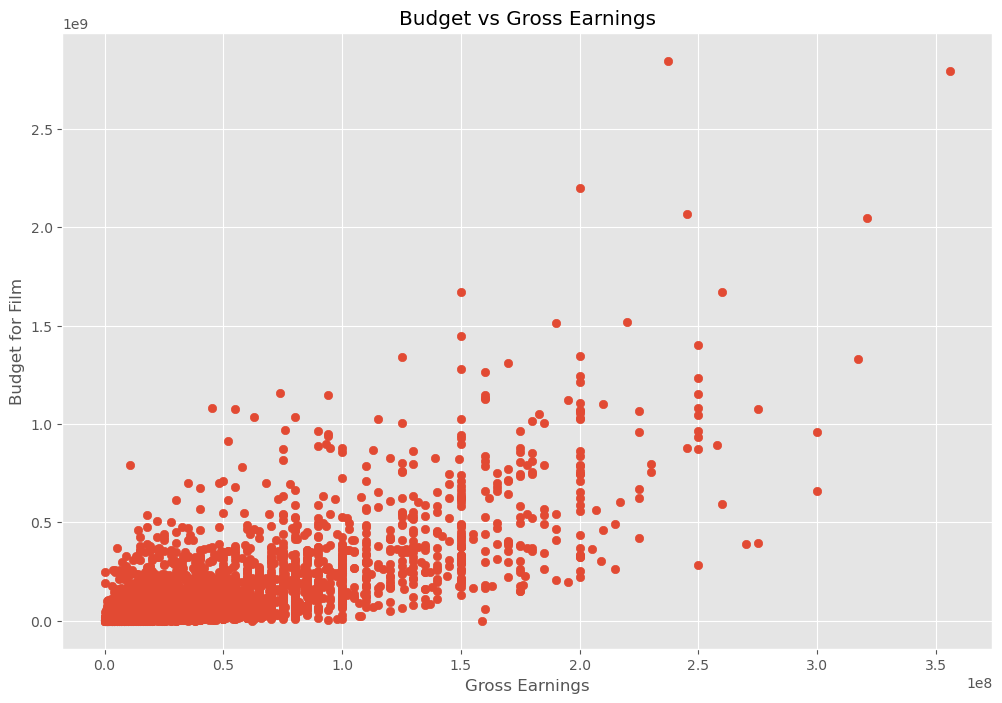

In [88]:
# Scatter plot with budget vs gross avenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

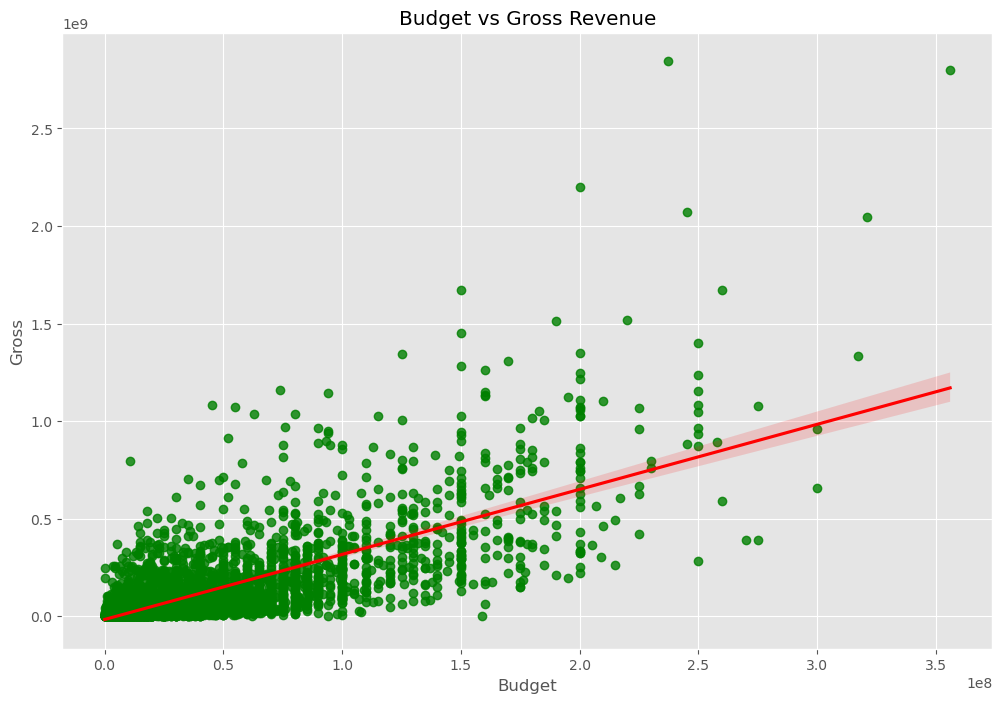

In [89]:
# Plot Budget vs Gross using seaborn regression.
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'green'}, line_kws={'color': 'red'})
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

#### In general, movies with a higher budget results in a higher revenue.
***

## Q2: Are scores associated with gross revenue?

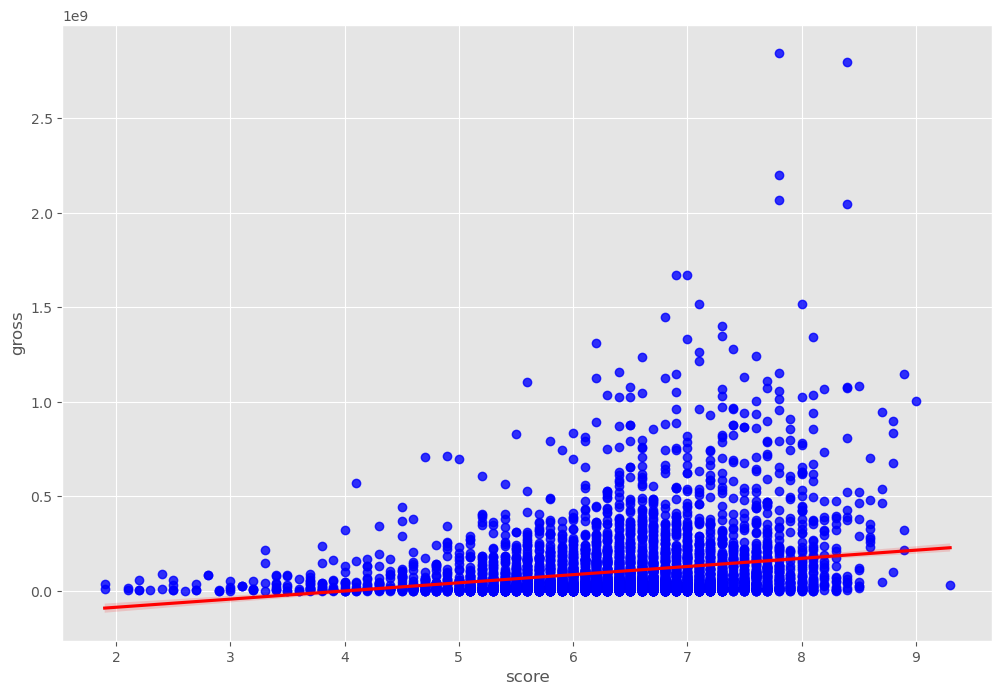

In [90]:
sns.regplot(x='score', y='gross', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

#### There is a correlation between scores and grosses, although this correlation is weaker than that between budget and gross.
***

## Q3: Are there any other factors correlated with high revenue?

In [91]:
# Correlation Matrix between all numeric columns
df.corr(numeric_only=True, method='pearson')

,score,votes,budget,gross,runtime,year_corrected
score,1.000000,0.473809,0.071792,0.222143,0.414580,0.061029
votes,0.473809,1.000000,0.440021,0.614904,0.352437,0.202883
budget,0.071792,0.440021,1.000000,0.740395,0.318595,0.320245
gross,0.222143,0.614904,0.740395,1.000000,0.275596,0.268626
runtime,0.414580,0.352437,0.318595,0.275596,1.000000,0.074432
year_corrected,0.061029,0.202883,0.320245,0.268626,0.074432,1.000000


In [92]:
df.corr(numeric_only=True, method ='kendall')

,score,votes,budget,gross,runtime,year_corrected
score,1.000000,0.350111,-0.006518,0.124715,0.292872,0.042612
votes,0.350111,1.000000,0.346228,0.553640,0.205616,0.292588
budget,-0.006518,0.346228,1.000000,0.512637,0.230879,0.213658
gross,0.124715,0.553640,0.512637,1.000000,0.176825,0.232192
runtime,0.292872,0.205616,0.230879,0.176825,1.000000,0.064120
year_corrected,0.042612,0.292588,0.213658,0.232192,0.064120,1.000000


In [93]:
df.corr(numeric_only=True, method ='spearman')

,score,votes,budget,gross,runtime,year_corrected
score,1.000000,0.495379,-0.010133,0.182857,0.413040,0.062508
votes,0.495379,1.000000,0.493404,0.745815,0.300959,0.422187
budget,-0.010133,0.493404,1.000000,0.693670,0.330276,0.302558
gross,0.182857,0.745815,0.693670,1.000000,0.257121,0.340211
runtime,0.413040,0.300959,0.330276,0.257121,1.000000,0.094520
year_corrected,0.062508,0.422187,0.302558,0.340211,0.094520,1.000000


In [94]:
# Reordering columns and rows to place 'budget' first and 'gross' second
# corr_matrix = df.corr(numeric_only=True, method='spearman')
# cols = corr_matrix.columns.tolist()
# cols.insert(0, cols.pop(cols.index('budget')))
# cols.insert(1, cols.pop(cols.index('gross')))
# corr_matrix = corr_matrix[cols]           # reordering columns
# corr_matrix = corr_matrix.loc[cols]       # reordering rows

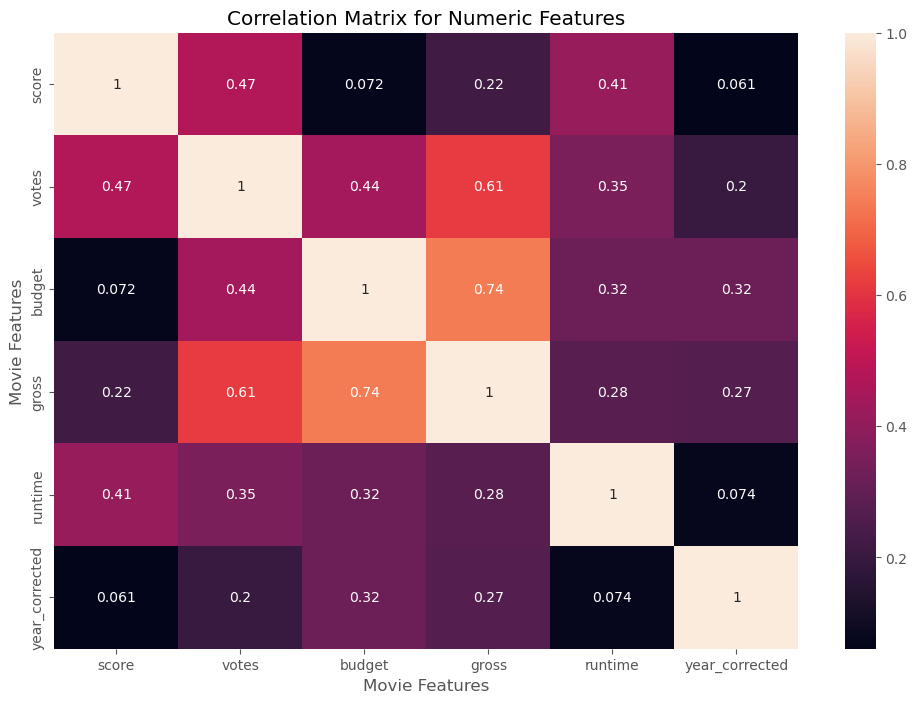

In [95]:
# Visualization with heatmap
corr_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

#### It looks like there is a strong correlation between gross and budget, as well as between gross and votes.
***

## Q4: Are companies related to a movie’s gross revenue?

In [96]:
# Look at correlation between gross and coampanies
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [109]:
# Numerize - Assign a random numeric value for each unique categorical value
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


In [98]:
df_numerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
name,1.000000,-0.023013,0.009617,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800,0.024734
rating,-0.023013,1.000000,0.128102,0.018836,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239,0.023634
genre,0.009617,0.128102,1.000000,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186,-0.068848
released,-0.005896,0.018836,0.021712,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.008614,-0.002927,0.008619,-0.005625
score,0.014955,0.059550,0.034061,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580,0.061029
votes,0.012915,0.009255,-0.136457,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437,0.202883
director,0.013699,0.014847,-0.009303,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082,-0.036281
writer,0.011602,-0.006923,0.017500,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672,-0.024397
star,-0.007109,0.003737,0.002619,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439,-0.033168
country,-0.024555,0.020148,-0.010847,-0.017231,-0.044690,0.042146,0.011108,0.022153,-0.010135,1.000000,0.054372,0.060929,0.049559,-0.033554,-0.073732


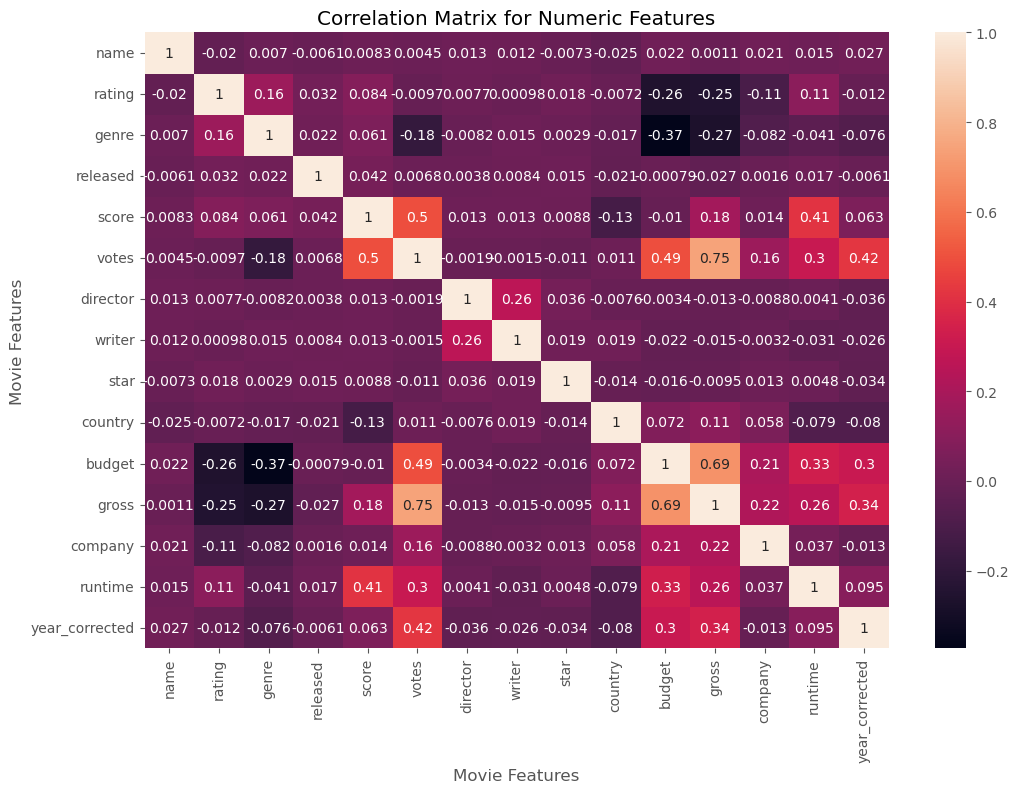

In [99]:
# Visualize with heatmap
corr_matrix = df_numerized.corr(numeric_only=True, method='spearman')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

#### There is a correlation between gross and companies, but it is relatively weak.

In [100]:
pd.set_option('display.max_rows', None)

corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

name            name              1.000000
                rating           -0.023013
                genre             0.009617
                released         -0.005896
                score             0.014955
                votes             0.012915
                director          0.013699
                writer            0.011602
                star             -0.007109
                country          -0.024555
                budget            0.023698
                gross             0.005966
                company           0.021209
                runtime           0.010800
                year_corrected    0.024734
rating          name             -0.023013
                rating            1.000000
                genre             0.128102
                released          0.018836
                score             0.059550
                votes             0.009255
                director          0.014847
                writer           -0.006923
           

In [101]:
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs > 0.5)]
high_corr

votes           gross             0.614904
gross           votes             0.614904
budget          gross             0.740395
gross           budget            0.740395
name            name              1.000000
writer          writer            1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
dtype: float64

#### Among all factors, votes and budget are most strongly correlated with gross earnings, whereas company shows a much weaker relationship.
***

## Q5: Are certain genres associated with higher grosses? If so, which ones?

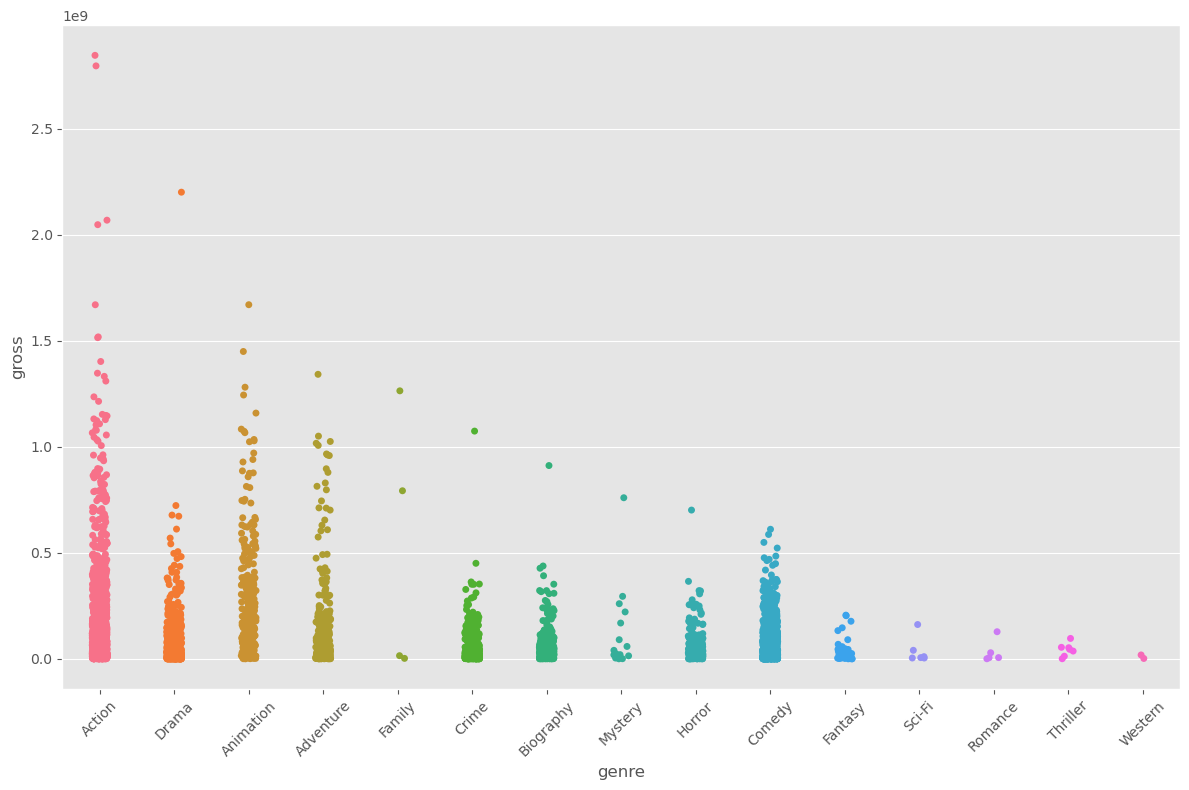

In [133]:
sns.stripplot(x="genre", y="gross", data=df, hue="genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Genres are associated with gross revenue; however, the correlation is not as strong as that between gross and votes or gross and budget. Among all genres, the highest grosses are seen in action, animation, adventure, drama, and so on.
***

## Q6: Which year produced the highest-grossing movies?

In [128]:
# Group by genre and sum the gross revenue
year_gross = df.groupby('year_corrected')['gross'].sum().sort_values(ascending=False)

# Display the result
year_gross

year_corrected
2017    28750488079
2018    28009036751
2019    27442837746
2015    27305403552
2016    27037324325
           ...     
2020     2851209288
1982     2818579164
1983     2322799554
1981     1704434042
1980     1629441719
Name: gross, Length: 41, dtype: int64

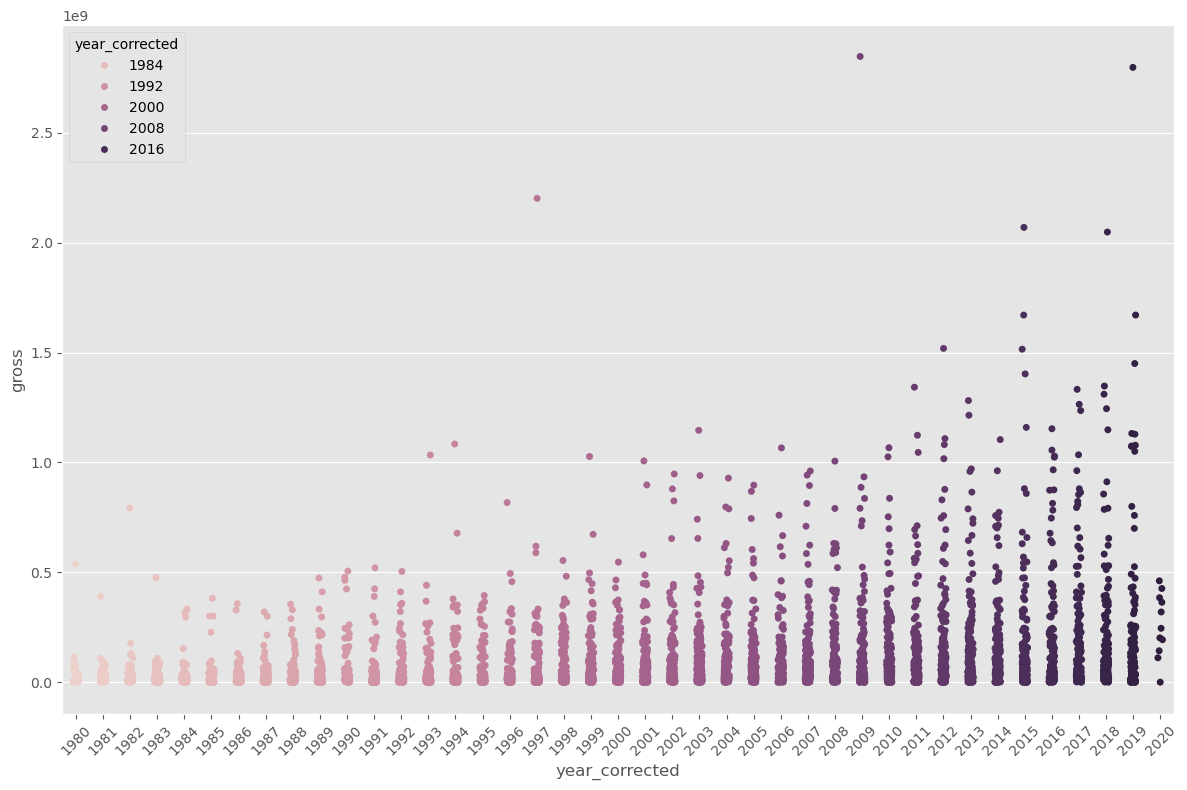

In [123]:
sns.stripplot(x="year_corrected", y="gross", data=df, hue='year_corrected')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generally, there is a tendency for more recent years to have higher revenue. The top three years are 2017, 2018, and 2019, whereas the bottom three years are 1980, 1981, and 1983.
***

# Conclusions
This analysis explores various factors that may influence a movie’s box office performance. Below are the key insights:

### 1. Budget and Revenue
> #### There is a strong positive relationship between a movie’s budget and its revenue. In general, higher-budget films tend to generate higher grosses.

### 2. Scores and Gross Revenue
> #### While there is a correlation between movie scores and revenue, it is weaker compared to the correlation between budget and revenue.

### 3. Other Correlated Factors
> #### In addition to budget, the number of votes also shows a strong relationship with gross revenue. These appear to be the most influential numeric factors.

### 4. Production Companies
> #### The correlation between production companies and gross revenue exists, but it is relatively weak, suggesting that a company's name alone is not a strong predictor of financial success.

### 5. Genres
> #### Genres are somewhat associated with revenue, though less strongly than budget or votes. Among all genres, action, animation, adventure, and drama tend to have the highest grosses.

### 6. Release Year Trends
> #### There is a clear trend showing that more recent movies tend to earn higher revenue. The top three years for box office performance are 2017, 2018, and 2019, while the lowest-performing years include 1980, 1981, and 1983.

The analysis reveals that movie revenue is most strongly correlated with budget and number of votes, while scores and production companies show weaker relationships. Although genres and release year also play a role—with action, animation, and adventure genres performing well and recent years (2017–2019) seeing the highest grosses—they are less predictive than budget and votes factors.